# Przetwarzanie sygnałów

## Zadanie 1

#### a) Przeanalizuj poniższy skrypt

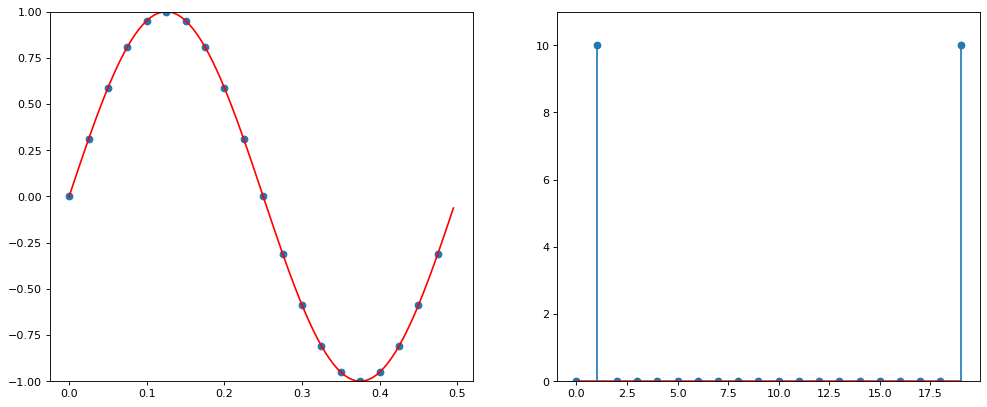

In [1]:
from pylab import *
from numpy import *
import math
from ipywidgets import *

#--- Definiujemy sygnal wejsciowy
A = 1        # Amplituda sygnalu
F = 2.0      # Czestotliwosc sygnalu [Hz]
T = 1/F      # Okres sygnalu [s]
f = lambda t : A * np.sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

#--- Probkujemy sygnal
LP = 1       # Liczba analizowanych pełnych okresów sygnału (okresow)
w = 40       # Częstotliwoćć probkowania [Hz]
TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
n = len(t)                 # Liczba próbek

signal = f(t)   

#--- Rysujemy sygnał (niebieskie kółka)
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
ax.plot(t, signal, 'o')

#--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
base_t = np.arange(0, LP * T, 1/200)
base_signal = f(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])

#--- Wykonujemy FFT
signal1 = fft.fft(signal)
signal1 = abs(signal1) # moduł

#--- Rysujemy FFT
ax = fig.add_subplot(122)
ymax = max(signal1)
ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

freqs = range(n)
stem(freqs, signal1, '-*');

**UWAGA**: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.t:

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [2]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
def prosta(a=2, b=0):
    x = np.linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)

interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

In [3]:
from pylab import *
from numpy import *
import math
from ipywidgets import *

def plot_fft(w=40, F=2.0, LP=1, A=1, func=None):
    """
    Funkcja do analizy sygnału i jego widma FFT.
    
    Argumenty:
        w (float): Częstotliwość próbkowania [Hz].
        F (float): Częstotliwość sygnału [Hz].
        LP (int): Liczba analizowanych pełnych okresów sygnału.
        A (float): Amplituda sygnału.
        func (callable, optional): Funkcja sygnału. Jeśli None, używa sinusoidy.
    """
    T = 1 / F      # Okres sygnału [s]
    TW = 1 / w     # Okres próbkowania [s]

    # Momenty, w których pobieramy próbki (oś OX)
    t = np.arange(0, LP * T, TW)
    n = len(t)  # Liczba próbek

    # Jeśli nie podano funkcji, domyślnie sygnał sinusoidalny
    if func is None:
        func = lambda t: A * np.sin(2 * pi * t * F)
    
    # Generowanie sygnału
    signal = func(t)

    # Rysowanie sygnału (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o', label="Próbki")
    
    # Rysowanie sygnału ciągłego (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = func(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygnał ciągły")
    ax.set_title("Sygnał w dziedzinie czasu")
    ax.legend()

    # Wykonywanie FFT
    signal_fft = fft.fft(signal)
    signal_fft = abs(signal_fft)  # Moduł
    
    # Rysowanie FFT
    ax = fig.add_subplot(122)
    freqs = np.arange(n) * w / n  # Rzeczywiste częstotliwości
    ymax = max(signal_fft)
    ax.stem(freqs, signal_fft, '-*', basefmt=" ")
    ax.set_ylim([0.0, max(1.1 * ymax, 3.0)])
    ax.set_title("Widmo amplitudowe")
    ax.set_xlabel("Częstotliwość [Hz]")
    ax.set_ylabel("Amplituda")
    plt.show()


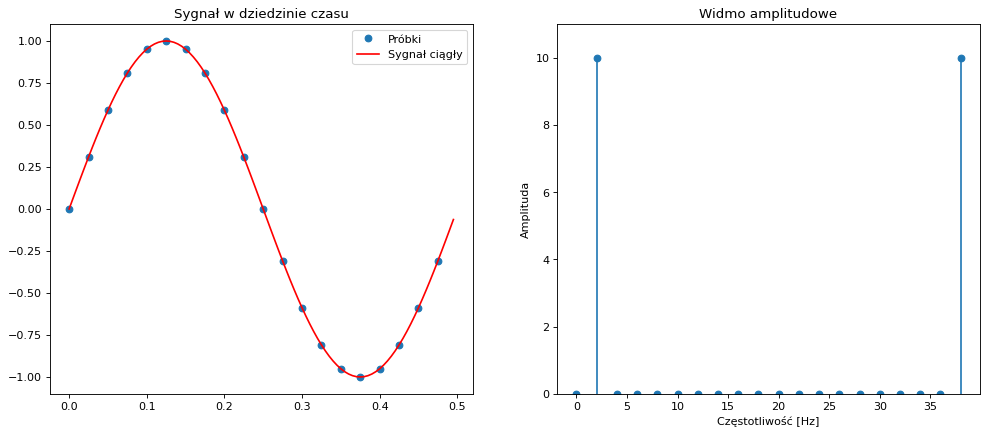

In [4]:
plot_fft(w=40, F=2.0, LP=1, A=1)

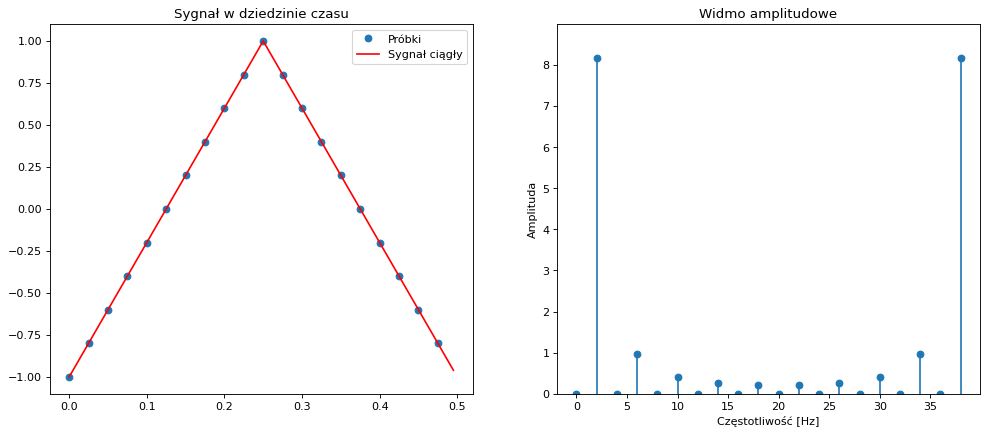

In [5]:
from scipy.signal import sawtooth
plot_fft(w=40, F=2.0, LP=1, A=1, func=lambda t: A * sawtooth(2 * pi * F * t, 0.5))

#### b) Zmień częstotliwość próbkowania na 50Hz.

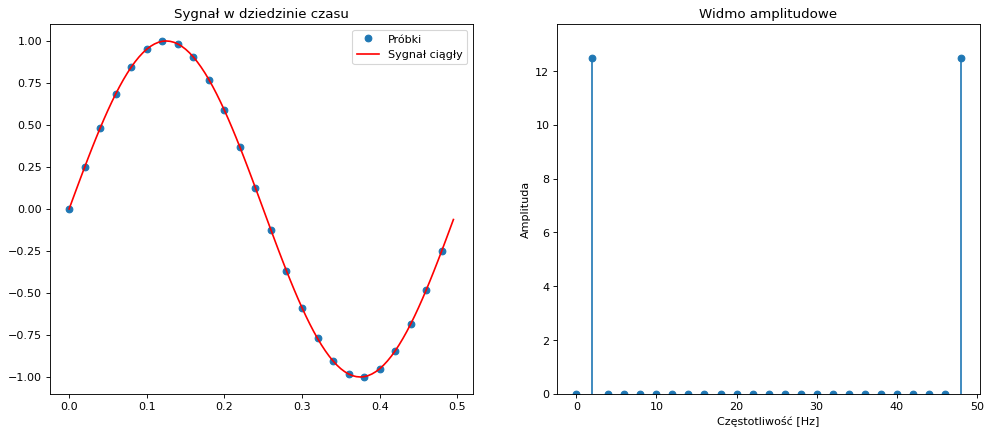

In [6]:
plot_fft(w=50, F=2.0, LP=1, A=1)

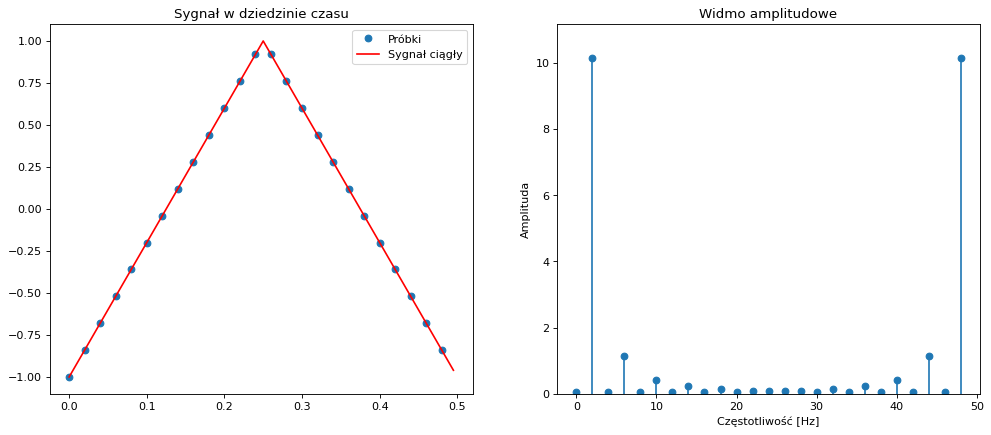

In [7]:
from scipy.signal import sawtooth
plot_fft(w=50, F=2.0, LP=1, A=1, func=lambda t: A * sawtooth(2 * pi * F * t, 0.5))

#### c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!) Hz, gdzie jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

In [8]:
from pylab import *
from numpy import *
import math
from scipy.signal import sawtooth  # Importujemy sawtooth z scipy.signal
from ipywidgets import *

def plot_fft(w=40, F=2.0, LP=1, A=1, func=None):
    """
    Funkcja do analizy sygnału i jego widma FFT.
    
    Argumenty:
        w (float): Częstotliwość próbkowania [Hz].
        F (float): Częstotliwość sygnału [Hz].
        LP (int): Liczba analizowanych pełnych okresów sygnału.
        A (float): Amplituda sygnału.
        func (callable, optional): Funkcja sygnału. Jeśli None, używa sinusoidy.
    """
    T = 1 / F      # Okres sygnału [s]
    TW = 1 / w     # Okres próbkowania [s]

    # Momenty, w których pobieramy próbki (oś OX)
    t = np.arange(0, LP * T, TW)
    n = len(t)  # Liczba próbek

    # Jeśli nie podano funkcji, domyślnie sygnał sinusoidalny
    if func is None:
        func = lambda t: A * np.sin(2 * pi * t * F)
    
    # Generowanie sygnału
    signal = func(t)

    # Rysowanie sygnału (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o', label="Próbki")
    
    # Rysowanie sygnału ciągłego (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = func(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygnał ciągły")
    ax.set_title("Sygnał w dziedzinie czasu")
    ax.legend()

    # Wykonywanie FFT
    signal_fft = fft.fft(signal)
    signal_fft = abs(signal_fft)  # Moduł
    
    # Rysowanie FFT
    ax = fig.add_subplot(122)
    freqs = np.arange(n) * w / n  # Oś częstotliwości w Hz
    ymax = max(signal_fft)
    ax.stem(freqs, signal_fft, '-*', basefmt=" ")  # Rysujemy FFT
    ax.set_xlim([0, w])
    ax.set_ylim([0.0, max(1.1 * ymax, 3.0)])
    ax.set_title("Widmo amplitudowe")
    ax.set_xlabel("Częstotliwość [Hz]")
    ax.set_ylabel("Amplituda")
    plt.show()


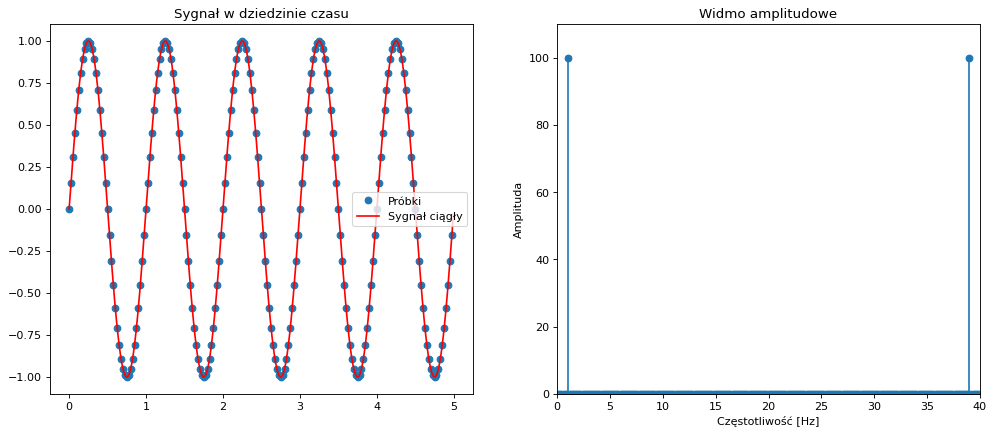

In [9]:
plot_fft(w=40, F=1.0, LP=5, A=1)

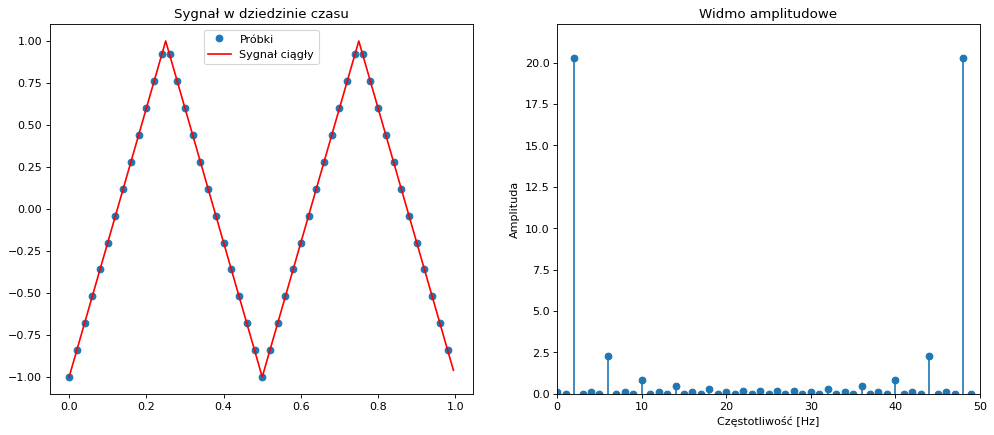

In [10]:
plot_fft(w=50, F=3.0, LP=3, A=1, func=lambda t: A * sawtooth(2 * pi * F * t, 0.5))

#### d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from numpy import pi

def plot_fft(w=20, F=5.0, LP=20, A=1, func=None):
    """
    Funkcja do analizy sygnału i jego widma FFT.
    
    Argumenty:
        w (float): Częstotliwość próbkowania [Hz].
        F (float): Częstotliwość sygnału [Hz].
        LP (int): Liczba analizowanych pełnych okresów sygnału.
        A (float): Amplituda sygnału.
        func (callable, optional): Funkcja sygnału. Jeśli None, używa sinusoidy.
    """
    T = 1 / F      # Okres sygnału [s]
    TW = 1 / w     # Okres próbkowania [s]

    # Momenty, w których pobieramy próbki (oś OX)
    t = np.arange(0, LP * T, TW)
    n = len(t)  # Liczba próbek

    # Jeśli nie podano funkcji, domyślnie sygnał sinusoidalny
    if func is None:
        func = lambda t: A * np.sin(2 * pi * t * F)
    
    # Generowanie sygnału
    signal = func(t)

    # Rysowanie sygnału (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o', label="Próbki")
    
    # Rysowanie sygnału ciągłego (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = func(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygnał ciągły")
    ax.set_title("Sygnał w dziedzinie czasu")
    ax.set_xlabel("Czas [s]")  # Etykieta osi X
    ax.set_ylabel("Amplituda")  # Etykieta osi Y
    ax.legend()

    # Wykonywanie FFT
    signal_fft = fft(signal)
    signal_fft = abs(signal_fft)  # Moduł
    
    # Rysowanie FFT
    ax = fig.add_subplot(122)
    freqs = np.arange(n) * w / n  # Oś częstotliwości w Hz
    ymax = max(signal_fft)
    ax.stem(freqs, signal_fft, '-*', basefmt=" ")  # Rysujemy FFT
    ax.set_xlim([0, w])
    ax.set_ylim([0.0, max(1.1 * ymax, 3.0)])
    ax.set_title("Widmo amplitudowe")
    ax.set_xlabel("Częstotliwość [Hz]")  # Etykieta osi X
    ax.set_ylabel("Wartość modułu części zespolonej")  # Etykieta osi Y
    plt.show()

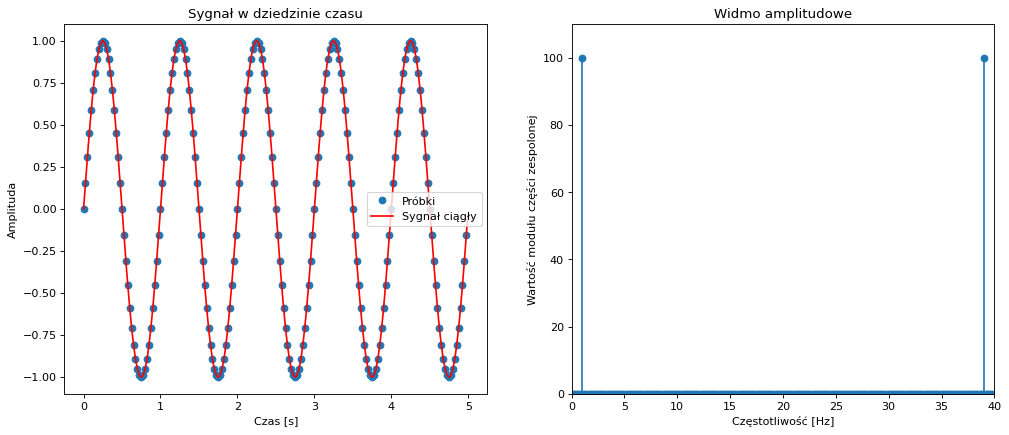

In [12]:
plot_fft(w=40, F=1.0, LP=5, A=1)

#### e) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. <font color='red'> Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? </font> Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. <font color='red'>Dlaczego uzyskano taki wynik? </font>

Dla częstotliwości 5 Hz:


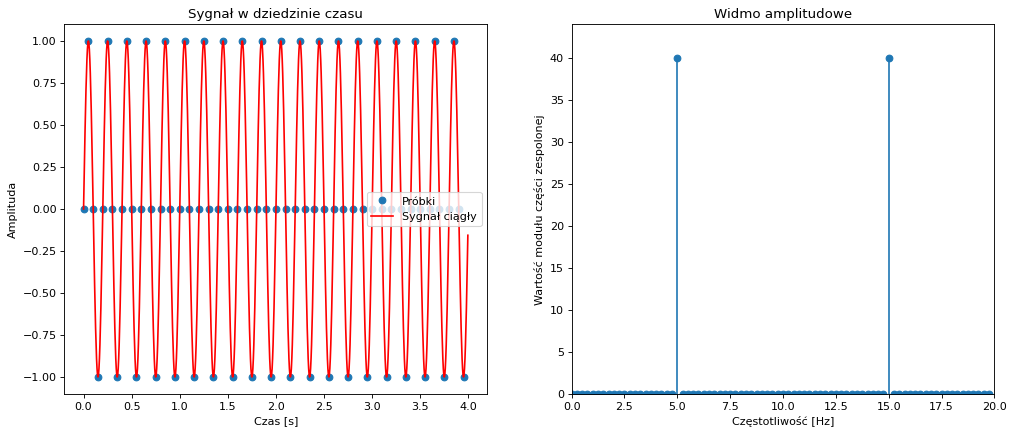

In [13]:
print("Dla częstotliwości 5 Hz:")
plot_fft(w=20, F=5.0, LP=20, A=1)

Dla częstotliwości 21 Hz:


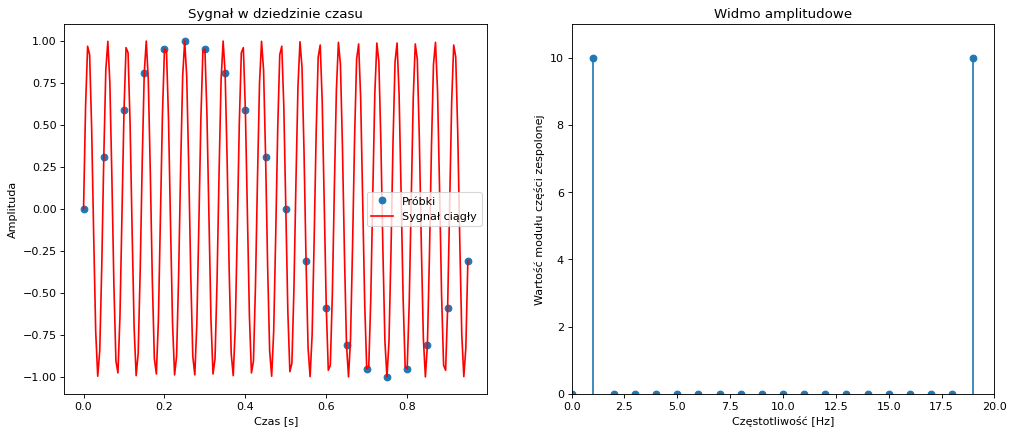

In [14]:
print("Dla częstotliwości 21 Hz:")
plot_fft(w=20, F=21.0, LP=20, A=1)

# Analiza wyników
1. Spróbkowanie funkcji sinusoidalnej 5 Hz:
Oś X dla wykresu w dziedzinie czasu (t) pokazuje próbki sygnału w czasie (sekundy).
Widmo FFT powinno wykazać wyraźny pik w okolicy 5 Hz, ponieważ sygnał ma częstotliwość 5 Hz.
Spróbkowane wartości będą dokładnie odwzorowywać pełny cykl sinusoidalny, ponieważ częstotliwość próbkowania (20 Hz) jest większa niż dwukrotność częstotliwości sygnału (czyli 2 * 5 Hz = 10 Hz), co spełnia kryterium Nyquista.
2. Spróbkowanie funkcji sinusoidalnej 21 Hz:
Oś X dla wykresu w dziedzinie czasu również pokazuje próbki sygnału w czasie.
Zauważysz, że częstotliwość próbkowania (20 Hz) jest mniejsza niż dwukrotność częstotliwości sygnału (21 Hz), co łamie zasadę Nyquista.
W wyniku tego, sygnał o częstotliwości 21 Hz będzie aliasowany, a na widmie FFT pojawi się zniekształcenie w postaci innej częstotliwości, bliskiej częstotliwości próbkowania (ok. 1 Hz). Jest to efektem aliasingu, gdzie częstotliwość powyżej Nyquista zostaje "zawrócona" do niższego pasma, tworząc artefakt w analizie.
Dlaczego uzyskano taki wynik?
Sygnał 5 Hz: Częstotliwość próbkowania 20 Hz jest wystarczająca, by poprawnie odwzorować ten sygnał bez aliasingu (ponieważ 
𝐹_probkowania>2⋅𝐹_sygnału).

Sygnał 21 Hz: Częstotliwość próbkowania 20 Hz jest mniejsza niż dwukrotność częstotliwości sygnału (czyli 40 Hz), więc częstotliwość próbkowania nie jest wystarczająca do wiernego odwzorowania sygnału. W rezultacie, sygnał 21 Hz ulega aliasingowi, czyli zniekształceniu, które powoduje, że widmo FFT pokazuje błędną, niższą częstotliwość (1 Hz w tym przypadku).

Podsumowanie:
Dla 5 Hz: Spróbkowanie jest prawidłowe, a wynik FFT jest poprawny.
Dla 21 Hz: Ze względu na aliasing, wynik FFT pokazuje częstotliwość 1 Hz, ponieważ sygnał nie został poprawnie odwzorowany (częstotliwość próbkowania nie spełnia zasady Nyquista).

#### f) Porównaj spektrum funkcji $sin(F*2\pi t)$, $2sin(F*2\pi t)$ i $3sin(F*2\pi t)$. <font color='red'>Jak zmienia się wartość na osi OY na wykresie spektrum</font>?

Funkcja sin(F*2*pi*t):


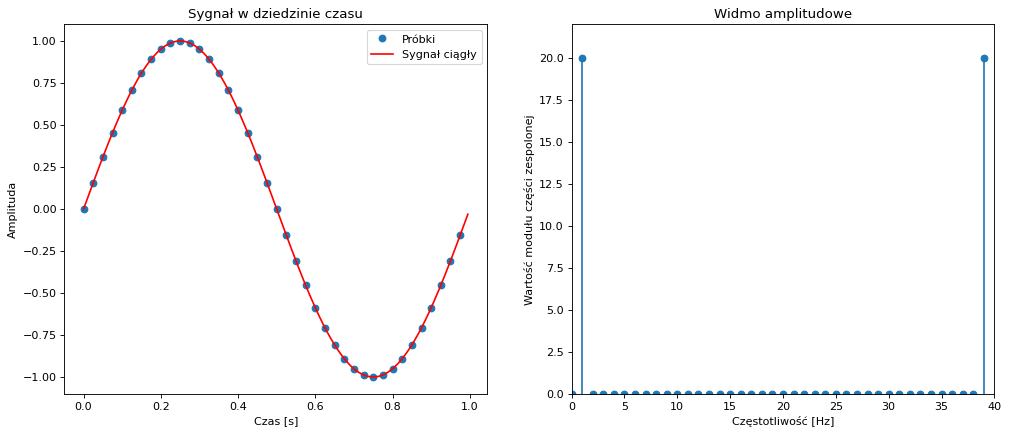

In [15]:
print("Funkcja sin(F*2*pi*t):")
plot_fft(w=40, F=1, LP=1, A=1)

Funkcja 2*sin(F*2*pi*t):


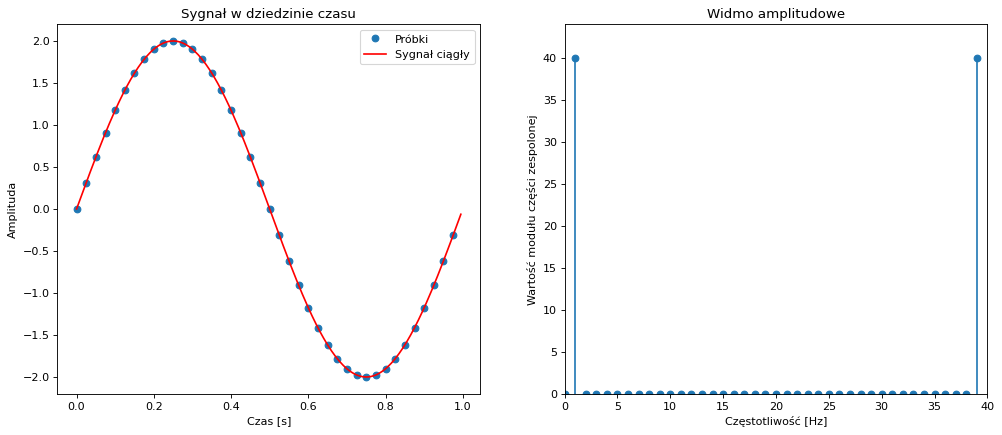

In [16]:
print("Funkcja 2*sin(F*2*pi*t):")
plot_fft(w=40, F=1, LP=1, A=2)

Funkcja 3*sin(F*2*pi*t):


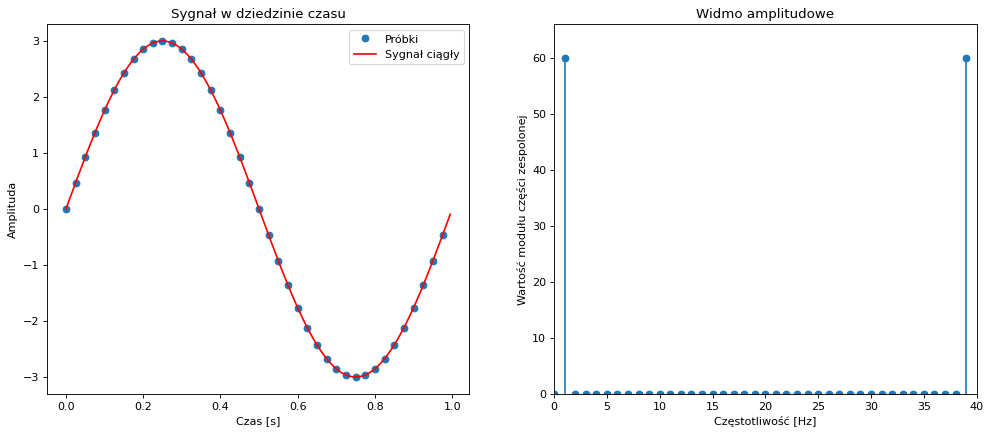

In [17]:
print("Funkcja 3*sin(F*2*pi*t):")
plot_fft(w=40, F=1, LP=1, A=3)

#### g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, $T=1s$? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwoęci próbkowania. Następnie: dla $sin(F*2\pi t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

### Krok 1: Liczba punktów na wykresach przy częstotliwości próbkowania 50 Hz

1. Częstotliwość próbkowania \( f_s = 50 \) Hz oznacza, że próbki są pobierane co \( T_w = \frac{1}{50} \) sekundy.
2. Przy okresie sygnału \( T = 1 \) sekunda (czyli \( F = 1 \) Hz), liczba próbek \( n \) na wykresie będzie wynosiła:
   \[
   n = f_s \times T = 50 \times 1 = 50 \text{ próbek}.
   \]

### Krok 2: Zwiększenie częstotliwości próbkowania dwukrotnie

Teraz zwiększymy częstotliwość próbkowania do 100 Hz, co oznacza, że próbki będą pobierane co \( T_w = \frac{1}{100} \) sekundy, a liczba próbek będzie wynosiła:
\[
n = 100 \times 1 = 100 \text{ próbek}.
\]

### Krok 3: Porównanie wartości na osi OY spektrum przy różnych częstotliwościach próbkowania

Po zwiększeniu częstotliwości próbkowania dwukrotnie, spodziewamy się, że amplituda na widmie FFT pozostanie mniej więcej taka sama, ale zyskamy wyższą rozdzielczość częstotliwościową w widmie. Oznacza to, że:

* Przy wyższej częstotliwości próbkowania otrzymamy więcej punktów na wykresie FFT, co pozwoli na dokładniejszą reprezentację sygnału.
* Amplituda na widmie (oś OY) może być nieco różna, ponieważ wyższe częstotliwości próbkowania mogą wpłynąć na dokładność obliczeń FFT, ale po normalizacji wartości FFT, amplituda powinna pozostać taka sama.pozostać taka sama.


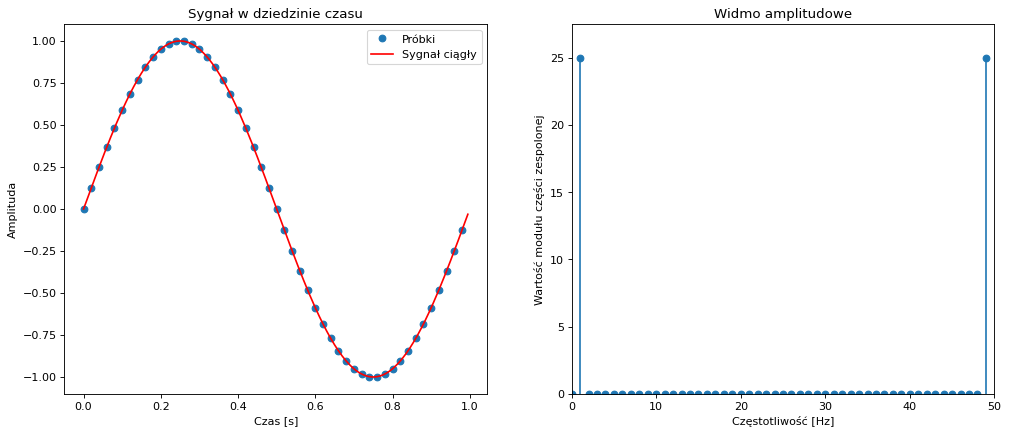

In [18]:
plot_fft(w=50, F=1, LP=1, A=1)

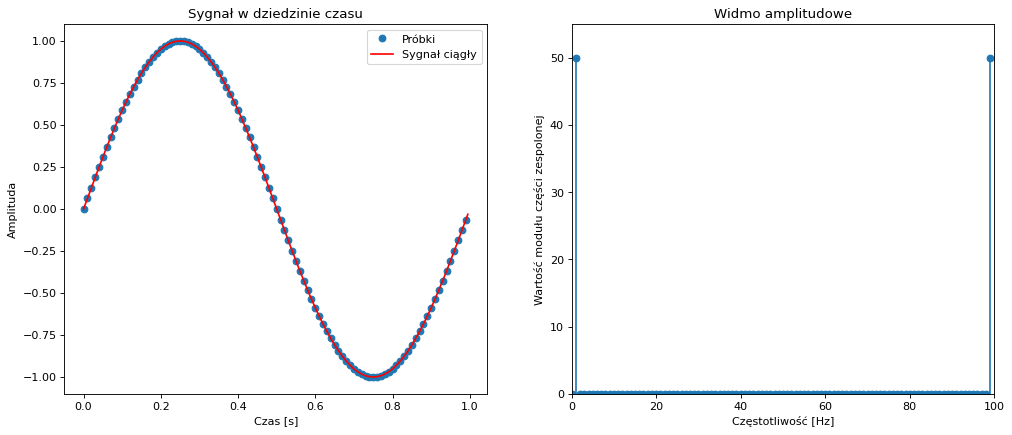

In [19]:
plot_fft(w=100, F=1, LP=1, A=1)

#### h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji (tu fajnie użyć interact), częstotliwości próbkowania oraz rozważanych liczb punktów. Pamiętaj o wysokim LP.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from numpy import pi

def plot_fft(w=20, F=5.0, LP=20, A=1, func=None):
    """
    Funkcja do analizy sygnału i jego widma FFT.
    
    Argumenty:
        w (float): Częstotliwość próbkowania [Hz].
        F (float): Częstotliwość sygnału [Hz].
        LP (int): Liczba analizowanych pełnych okresów sygnału.
        A (float): Amplituda sygnału.
        func (callable, optional): Funkcja sygnału. Jeśli None, używa sinusoidy.
    """
    T = 1 / F      # Okres sygnału [s]
    TW = 1 / w     # Okres próbkowania [s]

    # Momenty, w których pobieramy próbki (oś OX)
    t = np.arange(0, LP * T, TW)
    n = len(t)  # Liczba próbek

    # Jeśli nie podano funkcji, domyślnie sygnał sinusoidalny
    if func is None:
        func = lambda t: A * np.sin(2 * pi * t * F)
    
    # Generowanie sygnału
    signal = func(t)

    # Rysowanie sygnału (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o', label="Próbki")
    
    # Rysowanie sygnału ciągłego (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = func(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygnał ciągły")
    ax.set_title("Sygnał w dziedzinie czasu")
    ax.set_xlabel("Czas [s]")  # Etykieta osi X
    ax.set_ylabel("Amplituda")  # Etykieta osi Y
    ax.legend()

    # Wykonywanie FFT
    signal_fft = fft(signal)
    signal_fft = abs(signal_fft)  # Moduł

    # Normalizacja FFT (dzielenie przez liczbę próbek)
    signal_fft /= n//2
    
    # Rysowanie FFT
    ax = fig.add_subplot(122)
    freqs = np.arange(n) * w / n  # Oś częstotliwości w Hz
    ymax = max(signal_fft)
    ax.stem(freqs, signal_fft, '-*', basefmt=" ")  # Rysujemy FFT
    ax.set_xlim([0, w])
    ax.set_ylim([0.0, max(1.1 * ymax, 3.0)])
    ax.set_title("Widmo amplitudowe")
    ax.set_xlabel("Częstotliwość [Hz]")  # Etykieta osi X
    ax.set_ylabel("Wartość modułu części zespolonej")  # Etykieta osi Y
    plt.show()

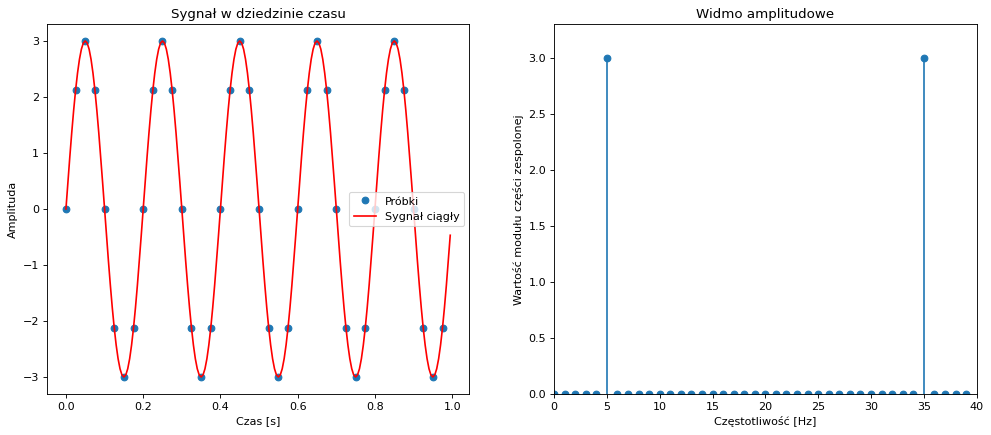

In [21]:
plot_fft(w=40, F=5, LP=5, A=3)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from numpy import pi
from ipywidgets import interact, FloatSlider

# Funkcja do analizy sygnału i jego widma FFT
def plot_fft(w=50, F=5.0, LP=1, A=1, func=None):
    """
    Funkcja do analizy sygnału i jego widma FFT.
    
    Argumenty:
        w (float): Częstotliwość próbkowania [Hz].
        F (float): Częstotliwość sygnału [Hz].
        LP (int): Liczba analizowanych pełnych okresów sygnału.
        A (float): Amplituda sygnału.
        func (callable, optional): Funkcja sygnału. Jeśli None, używa sinusoidy.
    """
    T = 1 / F      # Okres sygnału [s]
    TW = 1 / w     # Okres próbkowania [s]

    # Momenty, w których pobieramy próbki (oś OX)
    t = np.arange(0, LP * T, TW)
    n = len(t)  # Liczba próbek

    # Jeśli nie podano funkcji, domyślnie sygnał sinusoidalny
    if func is None:
        func = lambda t: A * np.sin(2 * pi * t * F)
    
    # Generowanie sygnału
    signal = func(t)

    # Rysowanie sygnału (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o', label="Próbki")
    
    # Rysowanie sygnału ciągłego (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = func(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygnał ciągły")
    ax.set_title("Sygnał w dziedzinie czasu")
    ax.set_xlabel("Czas [s]")  # Etykieta osi X
  


## Zadanie 2

#### Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej. Pamiętaj aby przeskalować oś OX na wykresie spektrum. Możesz przyjąć jako rozpatrywany okres rok, wówczas częstotliwość próbkowania będzie wynosiła 12.

In [23]:
dane = []
def read_data(file_name):
    with open(file_name, 'r') as file:
        dane = file.readlines()
        dane = np.genfromtxt(dane, dtype=float)
        print(dane)
        print(max(dane))
        print(len(dane)/12)
read_data("spots.txt")

[24.1 25.1 26.6 ... 76.3 36.4 31.4]
78.9
211.83333333333334


Maksymalna wartość widma: 3.950181899881217
Częstotliwość cyklu: 0.09 cykle/rok
Okres cyklu: 11.15 lata


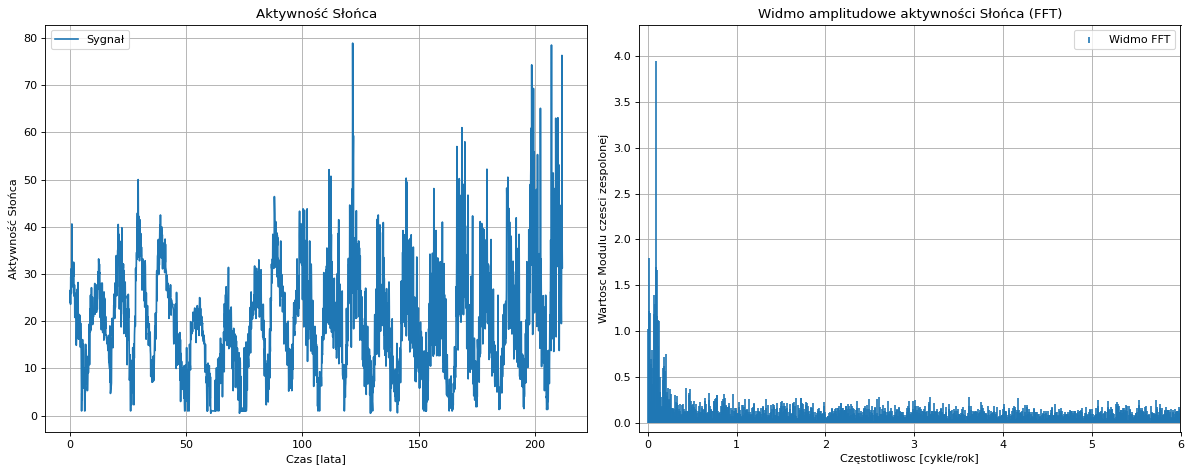

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def zad2(file_path, w):
    # Wczytanie danych z pliku
    dane = np.genfromtxt(file_path, dtype=float)

    # Parametry sygnału
    n = len(dane)
    TW = 1 / w  # Okres próbkowania [s]
    t = np.arange(0, n * TW, TW)  # Oś czasu

    # FFT sygnału
    signal_fft = np.abs(fft(dane, norm='forward'))
    freqs = fftfreq(n, TW)[:n // 2]  # Tylko częstotliwości dodatnie

    # Maksymalna wartość widma (bez DC)
    max_y = max(signal_fft[1:])
    dominant_freq_index = np.argmax(signal_fft[1:]) + 1
    dominant_freq = freqs[dominant_freq_index]
    cycle_period = 1 / dominant_freq

    print(f"Maksymalna wartość widma: {max_y}")
    print(f"Częstotliwość cyklu: {dominant_freq:.2f} cykle/rok")
    print(f"Okres cyklu: {cycle_period:.2f} lata")

    # Przygotowanie wykresów
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=80)

    # Wykres sygnału w dziedzinie czasu
    ax1.plot(t, dane, label="Sygnał")
    ax1.set_title("Aktywność Słońca")
    ax1.set_xlabel("Czas [lata]")
    ax1.set_ylabel("Aktywność Słońca")
    ax1.grid()
    ax1.legend()

    # Wykres widma amplitudowego
    ax2.stem(freqs[1:], signal_fft[1:n // 2], '-', basefmt=" ", label="Widmo FFT", markerfmt=' ')
    ax2.set_xlim([-0.1, w / 2])
    ax2.set_ylim([-0.1, 1.1 * max(signal_fft[1:])])
    ax2.set_title("Widmo amplitudowe aktywności Słońca (FFT)")
    ax2.set_xlabel("Częstotliwosc [cykle/rok]")
    ax2.set_ylabel("Wartosc Modulu czesci zespolonej")
    ax2.grid()
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Wywołanie funkcji z plikiem "spots.txt"
zad2("spots.txt", 12)


## Zadanie 3

#### Proste filtrowanie. Wykreśl sygnał sin(2pit) + sin(4pit), T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from numpy import pi

def plot_fft_zad3(w=20, F=1.0, LP=1, A=1, func=None):
    """
    Funkcja do analizy sygnału i jego widma FFT, z możliwością filtrowania.
    
    Argumenty:
        w (float): Częstotliwość próbkowania [Hz].
        F (float): Częstotliwość sygnału [Hz].
        LP (int): Liczba analizowanych pełnych okresów sygnału.
        A (float): Amplituda sygnału.
        func (callable, optional): Funkcja sygnału. Jeśli None, używa sinusoidy.
    """
    T = 1 / F      # Okres sygnału [s]
    TW = 1 / w     # Okres próbkowania [s]

    # Momenty, w których pobieramy próbki (oś OX)
    t = np.arange(0, LP * T, TW)
    n = len(t)  # Liczba próbek

    # Jeśli nie podano funkcji, domyślnie sygnał sinusoidalny
    if func is None:
        func = lambda t: A * np.sin(2 * pi * t * F)
    
    # Generowanie sygnału
    signal = func(t)

    # FFT sygnału
    signal_fft = fft(signal)
    freqs = fftfreq(n, TW)  # Częstotliwości odpowiadające FFT

    # Usuwanie składowej o częstotliwości 2 Hz
    filtered_fft = signal_fft.copy()
    filtered_fft[np.isclose(freqs, 2)] = 0  # Usuwanie dla f = 2 Hz
    filtered_fft[np.isclose(freqs, -2)] = 0  # Usuwanie dla f = -2 Hz

    # Odtwarzanie sygnału w dziedzinie czasu
    filtered_signal = np.real(ifft(filtered_fft))

    # Widmo amplitudowe sygnału filtrowanego
    filtered_fft_abs = abs(filtered_fft) / (n // 2)

    # Rysowanie wykresów
    fig = plt.figure(figsize=(15, 10), dpi=80)

    # Sygnał oryginalny w dziedzinie czasu
    ax = fig.add_subplot(221)
    ax.plot(t, signal, 'o', label="Próbki (oryginalny)")
    base_t = np.arange(0, LP * T, 1 / 200)
    base_signal = func(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygnał ciągły (oryginalny)")
    ax.set_title("Oryginalny sygnał w dziedzinie czasu")
    ax.set_xlabel("Czas [s]")
    ax.set_ylabel("Amplituda")
    ax.legend()
    ax.grid()

    # Widmo amplitudowe przed filtracją
    ax = fig.add_subplot(222)
    signal_fft_abs = abs(signal_fft) / (n // 2)
    ax.stem(freqs[:n//2], signal_fft_abs[:n//2], '-*', basefmt=" ", label="Widmo przed filtracją")
    ax.set_xlim([0, w // 2])
    ax.set_ylim([0, 1.1 * max(signal_fft_abs)])
    ax.set_title("Widmo amplitudowe przed filtracją")
    ax.set_xlabel("Częstotliwość [Hz]")
    ax.set_ylabel("Amplituda")
    ax.legend()
    ax.grid()

    # Sygnał przefiltrowany w dziedzinie czasu
    ax = fig.add_subplot(223)
    ax.stem(t, filtered_signal, '-*', label="Sygnał dyskretny (filtrowany)")
    ax.plot(t, filtered_signal, 'o', label="Próbki (filtrowane)")
    interp_t = np.linspace(t[0], t[-1], 200)  # Wartości czasu do interpolacji
    interp_signal = np.interp(interp_t, t, filtered_signal)
    ax.plot(interp_t, interp_signal, linestyle='-', color='orange', label="Sygnał ciągły (filtrowany)")
    ax.set_title("Przefiltrowany sygnał w dziedzinie czasu")
    ax.set_xlabel("Czas [s]")
    ax.set_ylabel("Amplituda")
    ax.set_xlim([0, T])
    ax.legend()
    ax.grid()
    
    # Widmo amplitudowe po filtracji
    ax = fig.add_subplot(224)
    ax.stem(freqs[:n//2], filtered_fft_abs[:n//2], '-*', basefmt=" ", label="Widmo po filtracji")
    ax.set_xlim([0, w / 2])
    ax.set_ylim([0, 1.1 * max(filtered_fft_abs)])
    ax.set_title("Widmo amplitudowe po filtracji")
    ax.set_xlabel("Częstotliwość [Hz]")
    ax.set_ylabel("Amplituda")
    ax.legend()
    ax.grid()

    plt.tight_layout()
    plt.show()


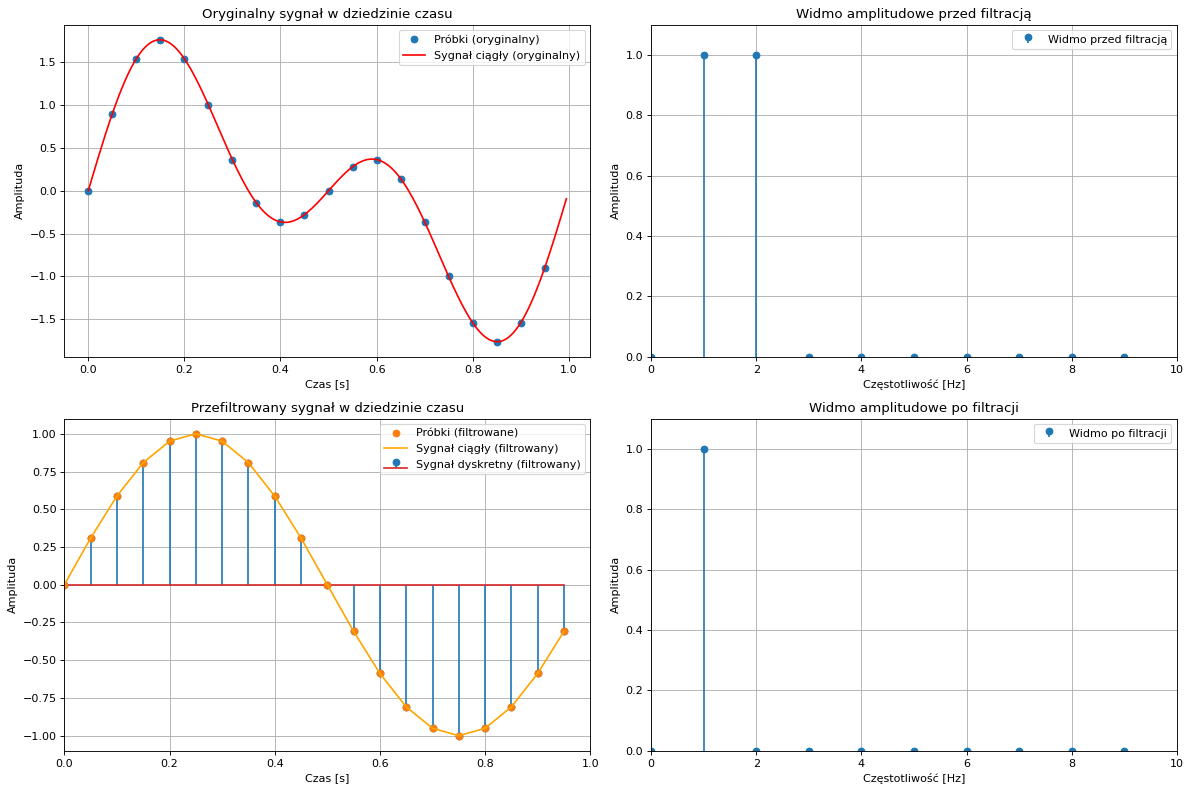

In [177]:
plot_fft_zad3(w=20, F=1.0, LP=1, A=1, func=lambda t: A * (np.sin(2 * pi * t) + np.sin(4 * pi * t)))

## Zadanie 4

#### Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości.

1258.0


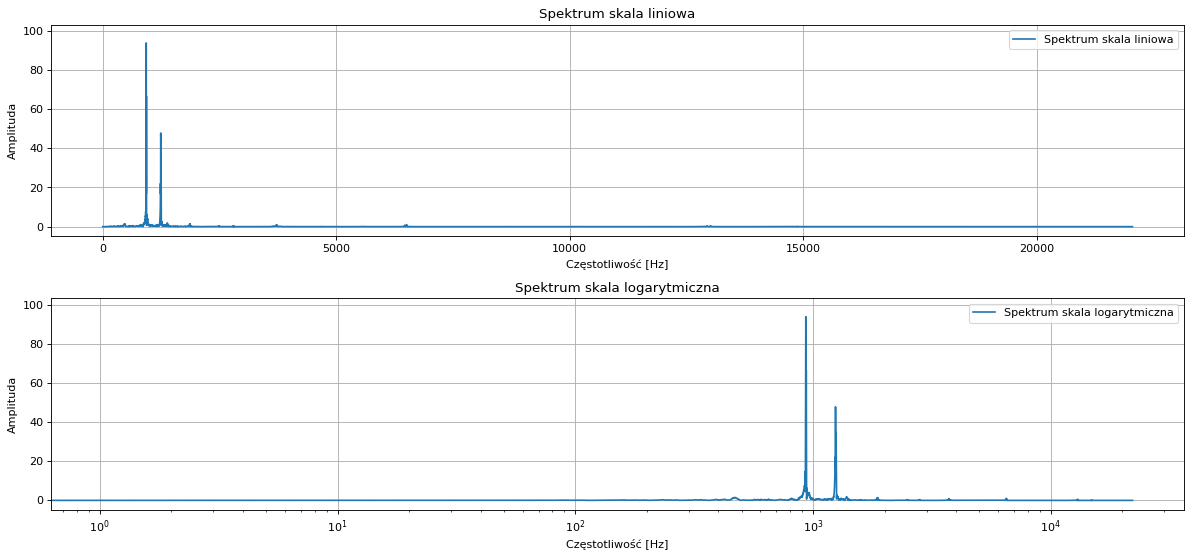

In [38]:
from playsound import playsound
from scipy.io import wavfile

# Wczytywanie pliku wav
# samplerate to częstotliwość próbkowania, data to próbki
samplerate, signal = wavfile.read('err.wav')

# Sprawdzenie liczby próbek i liczby kanałów
samples, channels = np.shape(signal)
#print(samples, channels)
if channels==2:
    signal=signal.mean(axis=1)
#plt.plot(range(samples), data[:,1])
print(max(signal))

n = len(signal)

 # FFT sygnału
signal_fft = fft(signal)
signal_fft = abs(signal_fft) #moduł
freqs = fftfreq(n, 1/samplerate)  # Częstotliwości odpowiadające FFT

# Normalizacja FFT (dzielenie przez liczbę próbek)
signal_fft /= n

# Rysowanie wykresów
fig = plt.figure(figsize=(15, 10), dpi=80)

# Spektrum (skala liniowa)
ax = fig.add_subplot(311)
ax.plot(freqs[:n//2], signal_fft[:n//2], '-', label="Spektrum skala liniowa")
#ax.set_xlim([0, samplerate // 2)
ax.set_ylim([-5, 1.1 * max(signal_fft)])
ax.set_title("Spektrum skala liniowa")
ax.set_xlabel("Częstotliwość [Hz]")
ax.set_ylabel("Amplituda")
ax.legend()
ax.grid()

# Spektrum (skala logarytmiczna)
ax = fig.add_subplot(312)
ax.semilogx(freqs[:n//2], signal_fft[:n//2], '-', label="Spektrum skala logarytmiczna")
#ax.set_xlim([0, samplerate // 2])
ax.set_ylim([-5, 1.1 * max(signal_fft)])
ax.set_title("Spektrum skala logarytmiczna")
ax.set_xlabel("Częstotliwość [Hz]")
ax.set_ylabel("Amplituda")
ax.legend()
ax.grid()

plt.tight_layout()

# Odtwarzanie dźwięku
#playsound('err.wav')